In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import os
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deploy"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
#2017250045 정태환
data = pd.read_csv('./datasets/diabetes.csv', sep=',')

print("data.head(): ", data.head())

data.describe()

data.info()

data.head():     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose        

In [5]:
X = data.values[:,0:8] 
y = data.values[:,8]

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
#2017250045 정태환
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
inputs = keras.Input(shape=(8,)) 
hidden1 = Dense(12,activation='relu')(inputs)
hidden2 = Dense(8,activation='relu',)(hidden1)
output = Dense(1,activation='sigmoid')(hidden2)
model = keras.Model(inputs,output)
#2017250045 정태환
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=100,batch_size=16,verbose=0)

model.save("my_remote_pima_model.h5")

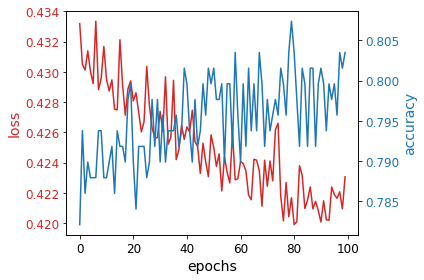

In [11]:
# summarize history for loss and accuracy as a function of the epochs 
fig, ax1 = plt.subplots()
#2017250045 정태환
color = 'tab:red'
ax1.set_xlabel('epochs') 
ax1.set_ylabel('loss', color=color)
ax1.plot(history.history['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue' 
ax2.set_ylabel('accuracy', color=color)
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [12]:
y_pred = model.predict(X_test[:3])
print("\ny_pred: \n", y_pred)


y_pred: 
 [[0.39811128]
 [0.10088098]
 [0.05999422]]


In [14]:
model_version = "0001"
model_name = "my_pima_model"
model_path = os.path.join(model_name, model_version) 
print("\nmodel_path: \n", model_path)
#2017250045 정태환
tf.saved_model.save(model, model_path)


model_path: 
 my_pima_model\0001
INFO:tensorflow:Assets written to: my_pima_model\0001\assets
